In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 12s 1us/step


In [4]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (60000, 28, 28) (60000,)
Test Set:  (10000, 28, 28) (10000,)


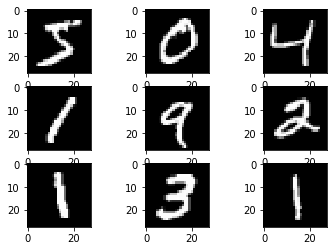

In [6]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [10]:
X_train = X_train / 255.0

In [11]:
X_test = X_test / 255.0

In [14]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [17]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (60000, 28, 28, 1) (60000,)
Test Set:  (10000, 28, 28, 1) (10000,)


In [18]:
from keras.utils import to_categorical

In [22]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [27]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(10, activation = 'sigmoid'))

In [28]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model', monitor = 'val_loss', verbose = 0, save_best_only = True, mode = 'auto')

In [30]:
history = model.fit(X_train, y_train, callbacks = [checkpoint], validation_data = (X_test, y_test), epochs = 10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 960us/step - loss: 0.1703 - accuracy: 0.9503 - val_loss: 0.0666 - val_accuracy: 0.9778
Epoch 2/10
60000/60000 [==============================] - 55s 922us/step - loss: 0.0560 - accuracy: 0.9829 - val_loss: 0.0513 - val_accuracy: 0.9835
Epoch 3/10
60000/60000 [==============================] - 56s 929us/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0502 - val_accuracy: 0.9837
Epoch 4/10
60000/60000 [==============================] - 55s 915us/step - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0430 - val_accuracy: 0.9868
Epoch 5/10
60000/60000 [==============================] - 56s 930us/step - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.0449 - val_accuracy: 0.9862
Epoch 6/10
60000/60000 [==============================] - 55s 914us/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0556 - val_accuracy: 0.9843
Epoch 7/10
60000/60000 [==============================] 

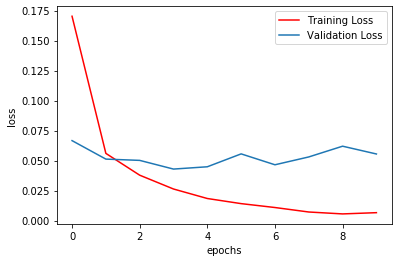

In [31]:
plt.plot(history.history['loss'], 'r', label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

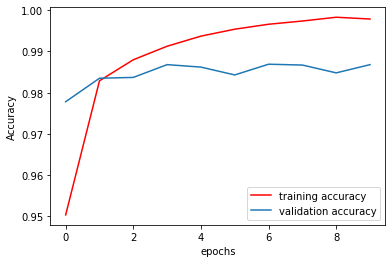

In [32]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 163us/step


In [34]:
print(f"Accuracy = {round(accuracy * 100, 2)}%")

Accuracy = 98.68%


In [49]:
def pred(image):
    number = np.argmax(model.predict(image.reshape((1,28,28,1))))
    print(f"PREDICTED NUMBER IS = {number}")
    plt.imshow(image.reshape((28,28)), cmap=plt.get_cmap('gray'))
    plt.show()

PREDICTED NUMBER IS = 1


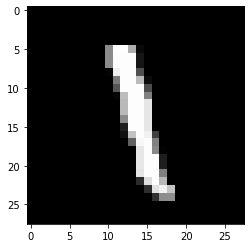

In [53]:
pred(X_test[700])

In [54]:
import pickle

In [55]:
pickle.dump(model, open('HWNR.pkl', 'wb'))